## Importing libraries


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant disease dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 53730 files belonging to 70 classes.


### Validation Image Preprocessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant disease dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 15363 files belonging to 70 classes.


## Building Model

In [36]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential 

In [37]:
model = Sequential()

## Building Convolutional Layers

In [38]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [40]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Dropout(0.25))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(units=1500,activation='relu'))

In [46]:
model.add(Dropout(0.4))

In [47]:
model.add(Dense(units=70,activation='softmax'))

## Compiling Model

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 70)                  │         105,070 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,890,794 (30.10 MB)

 Trainable params: 7,890,794 (30.10 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [50]:
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 1084s 643ms/step - accuracy: 0.3905 - loss: 2.4232 - val_accuracy: 0.6822 - val_loss: 1.0293
Epoch 2/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 1090s 649ms/step - accuracy: 0.7191 - loss: 0.9256 - val_accuracy: 0.8030 - val_loss: 0.6236
Epoch 3/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 1008s 600ms/step - accuracy: 0.7980 - loss: 0.6429 - val_accuracy: 0.8457 - val_loss: 0.4902
Epoch 4/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 1002s 596ms/step - accuracy: 0.8382 - loss: 0.5050 - val_accuracy: 0.8531 - val_loss: 0.4608
Epoch 5/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 983s 585ms/step - accuracy: 0.8614 - loss: 0.4228 - val_accuracy: 0.8638 - val_loss: 0.4351
Epoch 6/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 958s 570ms/step - accuracy: 0.8839 - loss: 0.3493 - val_accuracy: 0.8626 - val_loss: 0.4426
Epoch 7/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 955s 568ms/step - accuracy: 0.9011 - loss: 0.2978 - val_accuracy: 0.8768 - val_loss: 0.4230
Epoch 8/10
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 1003s 597ms/step

## Model Evaluation

In [55]:
train_loss, train_acc = model.evaluate(training_set)

1680/1680 ━━━━━━━━━━━━━━━━━━━━ 241s 143ms/step - accuracy: 0.9598 - loss: 0.1170


In [56]:
print(train_loss, train_acc)

0.09961690753698349 0.9659594297409058


In [57]:
# Model Evaluation for validation data 
val_loss, val_acc = model.evaluate(validation_set)

481/481 ━━━━━━━━━━━━━━━━━━━━ 72s 150ms/step - accuracy: 0.8784 - loss: 0.4802


In [58]:
print(val_loss, val_acc)

0.45069050788879395 0.8831608295440674


## Saving Model

In [59]:
model.save("Plant_disease_trained_model.h5")

In [60]:
model.save("Plant_disease_trained_model.keras")

In [61]:
training_history.history

{'accuracy': [0.5329797267913818,
  0.7430485486984253,
  0.8104410767555237,
  0.8472920060157776,
  0.8719523549079895,
  0.8912339210510254,
  0.9084310531616211,
  0.9225013852119446,
  0.9344872236251831,
  0.9447236061096191],
 'loss': [1.7175523042678833,
  0.8384256362915039,
  0.603740394115448,
  0.4737716615200043,
  0.3864811360836029,
  0.3235669434070587,
  0.2723771631717682,
  0.22384953498840332,
  0.192239448428154,
  0.16110742092132568],
 'val_accuracy': [0.6821584105491638,
  0.8029681444168091,
  0.8457332849502563,
  0.8530886173248291,
  0.8638286590576172,
  0.8625919222831726,
  0.8767818808555603,
  0.8668879866600037,
  0.8793855309486389,
  0.8831608295440674],
 'val_loss': [1.0292928218841553,
  0.6235955357551575,
  0.49016860127449036,
  0.46076393127441406,
  0.4350888431072235,
  0.4425598978996277,
  0.42298585176467896,
  0.49845558404922485,
  0.42791056632995605,
  0.45069050788879395]}

In [62]:
#Recording history in json file 
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

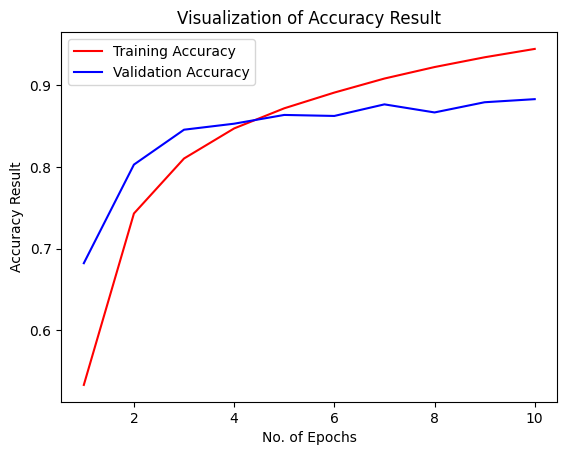

In [68]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other Metrics for model evaluation


In [10]:
class_name = validation_set.class_names
class_name

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight',
 'Jamun__diseased',
 'Jamun__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pomegranate__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
 'Soybean__caterpillar',
 'Soybean__diabrotica_speciosa',
 'Soybean__healthy'

In [11]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant disease dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 15363 files belonging to 70 classes.


In [12]:
from tensorflow.keras.models import load_model

In [13]:
model = load_model("plant_disease_trained_model.keras")

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
y_pred = model.predict(test_set)
y_pred

481/481 ━━━━━━━━━━━━━━━━━━━━ 80s 166ms/step


array([[9.9999642e-01, 2.9216937e-10, 3.5699613e-11, ..., 3.7766570e-14,
        1.2848828e-12, 1.0791484e-15],
       [9.9999964e-01, 3.4581765e-11, 7.0687824e-11, ..., 3.4436810e-16,
        3.7830077e-13, 2.2120206e-16],
       [1.0000000e+00, 3.3287498e-11, 1.1713547e-12, ..., 2.4860857e-15,
        3.3357078e-12, 3.8780885e-16],
       ...,
       [1.1732849e-16, 4.2500785e-13, 1.0054859e-08, ..., 9.6674216e-07,
        1.1891160e-07, 9.9999881e-01],
       [3.0949266e-07, 1.7238137e-05, 6.3582038e-04, ..., 4.6122607e-04,
        5.8019035e-03, 7.9908675e-01],
       [1.3253592e-09, 6.1612985e-07, 3.3536377e-05, ..., 2.7218208e-04,
        1.4113745e-03, 7.0670269e-02]], dtype=float32)

In [15]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [16]:
predicted_categories

<tf.Tensor: shape=(15363,), dtype=int64, numpy=array([ 0,  0,  0, ..., 69, 69, 15], dtype=int64)>

In [17]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(15363, 70), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [18]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(15363,), dtype=int64, numpy=array([ 0,  0,  0, ..., 69, 69, 69], dtype=int64)>

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                precision    recall  f1-score   support

              Apple__black_rot       0.97      0.99      0.98       124
                Apple__healthy       0.94      0.92      0.93       330
                   Apple__rust       0.92      0.76      0.83        72
                   Apple__scab       0.92      0.79      0.85       140
     Cassava__bacterial_blight       0.41      0.33      0.36        97
 Cassava__brown_streak_disease       0.32      0.21      0.25       112
         Cassava__green_mottle       0.23      0.34      0.28        94
              Cassava__healthy       0.22      0.19      0.20       136
       Cassava__mosaic_disease       0.29      0.31      0.30        89
               Cherry__healthy       0.98      0.93      0.95       181
        Cherry__powdery_mildew       0.95      0.98      0.97       210
             Corn__common_rust       0.96      0.94      0.95       262
          Corn__gray_leaf_spot       0.93      0.89      0.91  

In [23]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[123,   0,   0, ...,   0,   0,   0],
       [  0, 304,   0, ...,   0,   0,   0],
       [  0,   0,  55, ...,   1,   0,   2],
       ...,
       [  0,   0,   0, ..., 150,   3,  24],
       [  0,   0,   0, ...,   0, 217,  10],
       [  0,   0,   0, ...,   5,   2, 215]], dtype=int64)

## Confusion Matrix Vsisualization

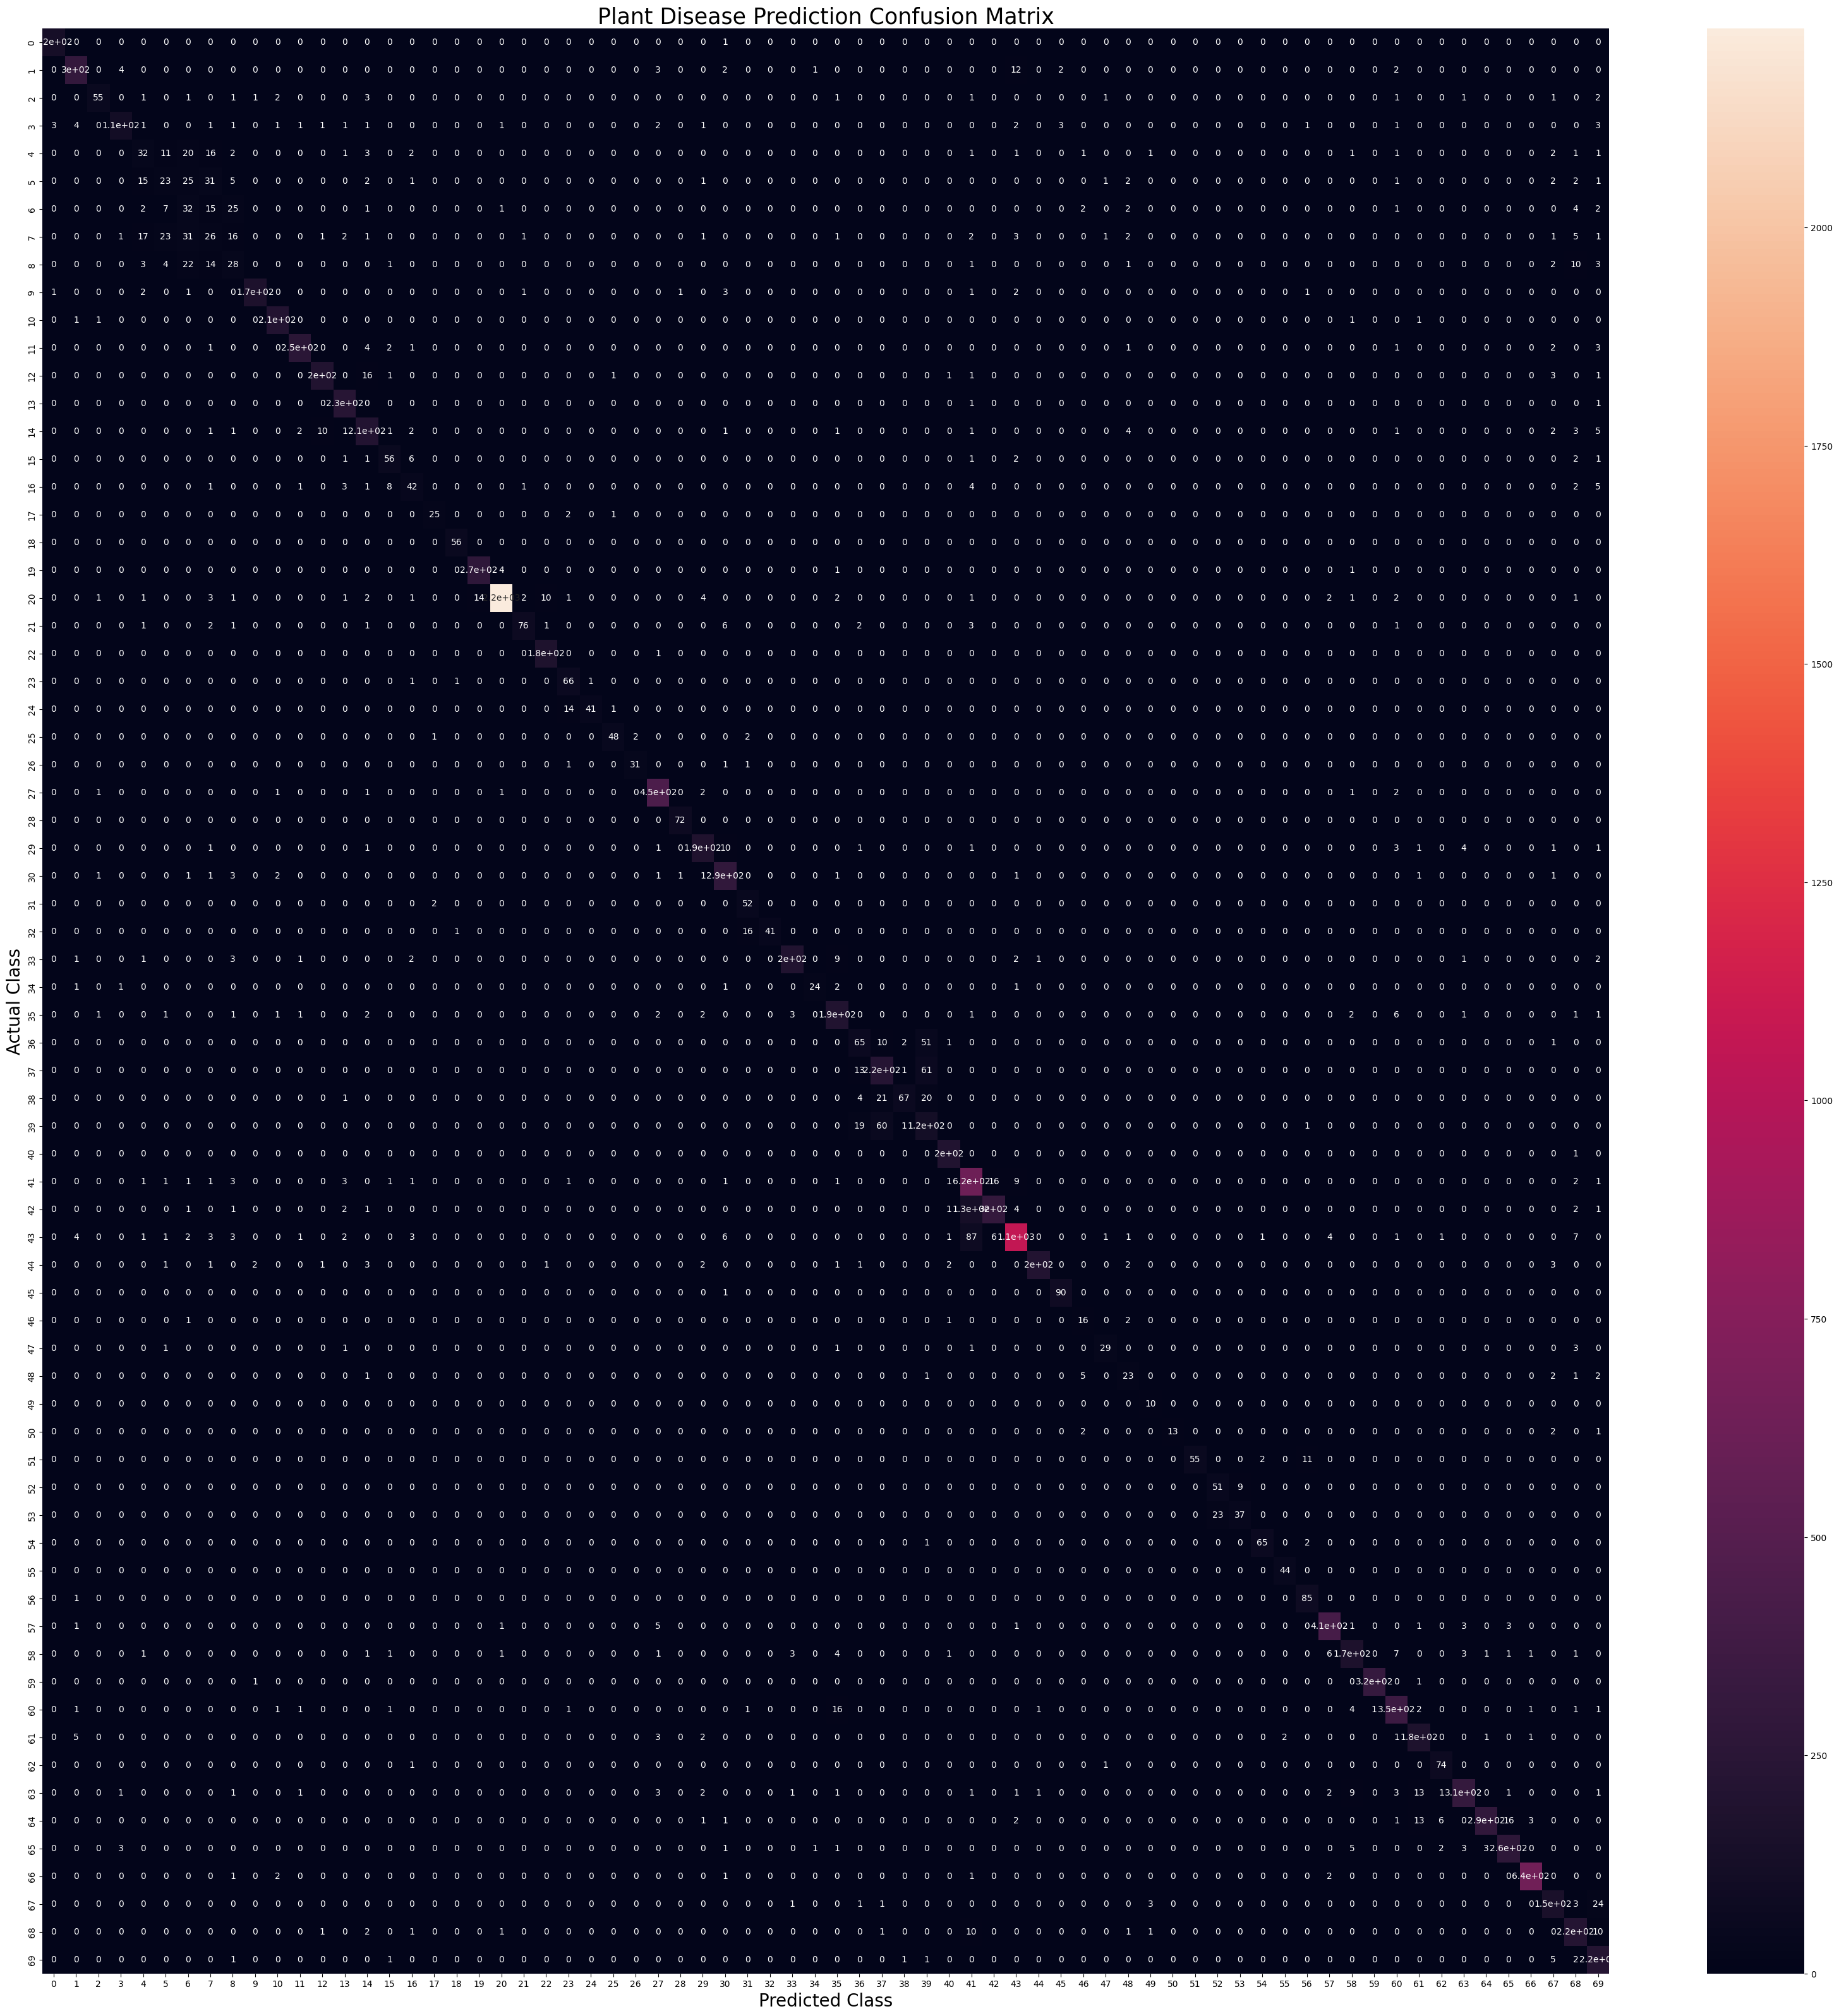

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()